## O que temos que fazer:
1. Coleta dos dados
2. Pré-Processamento: Definição de tipos, Tratamento de dados ausentes, Normalização e Discretização, Limpeza de dados
3. Apresentar Estatísticas Descritivas
4. Realizar Testes de Hipótese
5. Bônus






### Importar as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt    #cria gráficos
import seaborn as sns             #biblioteca que cria gráficos com quaisquer mapas de cores da biblioteca matplotlib

## Sobre o dataset:
Obtido em: https://allisonhorst.github.io/palmerpenguins/

Os dados foram coletados e disponibilizados pela Dra. Kristen Gorman e pela Estação Palmer, Antarctica LTER , membro da Long Term Ecological Research Network.

O conjunto de dados contêm dados de 344 pinguins. Existem 3 espécies diferentes de pinguins neste conjunto de dados, coletados em 3 ilhas do Arquipélago Palmer, na Antártica.

### Importação do dataset

In [2]:
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins_raw.csv'
df = pd.read_csv(url)

In [3]:
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


# Pré-Processamento



## Definição de Tipos

Vamos limpar a coluna de comentários porque ela não agrega nenhuma informação relevante e há muitos dados faltantes:

In [4]:
df = df.drop('Comments', axis=1)

In [5]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


In [6]:
df.shape
print("Número de linhas:", df.shape[0])
print("Número de colunas:", df.shape[1])

Número de linhas: 344
Número de colunas: 16


In [7]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


Aqui temos as colunas correspondentes aos dados contínuos.
Por exemplo, 'Culmen Lenght' e 'Culmen Depth' correspondem ao comprimento e profundidade dos bicos dos pinguins.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

Vamos ajustar os tipos de dados definidos como 'object' para 'category'.

In [9]:
df['studyName'] = df['studyName'].astype('category')
df['Species'] = df['Species'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Island'] = df['Island'].astype('category')
df['Stage'] = df['Stage'].astype('category')
df['Individual ID'] = df['Individual ID'].astype('category')
df['Clutch Completion'] = df['Clutch Completion'].astype('category')
df['Date Egg'] = df['Date Egg'].astype('category')
df['Sex'] = df['Sex'].astype('category')

In [10]:
counts = df['Species'].value_counts()
print(counts)

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64


Aqui temos que as colunas 'studyName', 'Species', 'Region', 'Island', 'Stage', 'Individual ID', 'Clutch Completion ', 'Date Egg ', 'Sex' são colunas correspondentes aos dados categóricos. Por exemplo, 'Species' é uma feature nominal que pode atribuir a qual espécie estamos tratando naquela linha, sendo elas Gentoo, Adélie ou Chinstrap. Além disso, vemos que a maior parte dos pinguins pertencem as Especies Adelie e Gentoo, sendo a Chinstrap a que tem a menor quantidade de representações no dataset.

## Pré-Processamento

### Tratamento de dados ausentes

In [11]:
print(df.isnull().sum())

studyName               0
Sample Number           0
Species                 0
Region                  0
Island                  0
Stage                   0
Individual ID           0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64


Com isso, é possível notar que algumas colunas que possuem muitos dados ausentes(7 colunas de um total de 16). Entretanto, foi possível observar anteriormente que haviam algumas linhas com muitos dados faltantes, dessa forma, vamos contar quantas linhas possuem pelo menos 40% de dados faltantes e removê-las.

In [12]:
threshold = 0.4

num_faltantes = df.isnull().mean(axis=1)
linhas_faltantes = (num_faltantes > threshold).sum()

print(f"Número de linhas com mais de 40% de valores ausentes: {linhas_faltantes}")

Número de linhas com mais de 40% de valores ausentes: 2


In [13]:
df = df.loc[num_faltantes <= threshold]


Verificando os novos valores ausentes:

In [14]:
df.isnull().sum()

studyName               0
Sample Number           0
Species                 0
Region                  0
Island                  0
Stage                   0
Individual ID           0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Sex                     9
Delta 15 N (o/oo)      12
Delta 13 C (o/oo)      11
dtype: int64

Agora que foram removidas linhas com mais de 40% de valores ausentes, vamos reaproveitar linhas e colunas com dados ausentes e inputar novos valores nelas. Porém, antes de fazer qualquer operação de inserção, vamos observar as correlações entre os dados.

Para analisar as colunas "Delta 15 N" e "Delta 13 C", vamos usar a correlação de Spearman, pois ela é mais robusta e pode capturar relações monotônicas que podem surgir após a imputação.

Para contextualizar um pouco o que significam essas features, vamos deixar aqui uma breve explicação:


*   **Delta 15 N (15N):** Mede a razão dos isótopos estáveis de nitrogênio 15N:14N. Este valor pode fornecer informações sobre a posição trófica (nível na cadeia alimentar) do pinguim, já que níveis mais altos de δ15N geralmente indicam que o organismo está mais alto na cadeia alimentar.

*   **Delta 13 C (13C):** Mede a razão dos isótopos estáveis de carbono 13C:12C. Esse valor pode indicar o tipo de dieta e o habitat dos pinguins, ajudando a diferenciar entre ambientes marinhos e terrestres, ou mesmo entre diferentes zonas de forrageamento no mar.



In [15]:
df.corr(method='spearman', numeric_only=True)

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Sample Number,1.000000,-0.213298,-0.049514,0.059690,0.009278,0.009353,-0.495038
Culmen Length (mm),-0.213298,1.000000,-0.221749,0.672772,0.583800,-0.093661,0.150251
Culmen Depth (mm),-0.049514,-0.221749,1.000000,-0.523267,-0.432372,0.615697,0.430920
Flipper Length (mm),0.059690,0.672772,-0.523267,1.000000,0.839974,-0.500186,-0.356087
Body Mass (g),0.009278,0.583800,-0.432372,0.839974,1.000000,-0.553768,-0.386939
Delta 15 N (o/oo),0.009353,-0.093661,0.615697,-0.500186,-0.553768,1.000000,0.544820
Delta 13 C (o/oo),-0.495038,0.150251,0.430920,-0.356087,-0.386939,0.544820,1.000000


Dado as correlações acima, podemos concluir que em relação às colunas que queremos inputar, temos que


*   Culmen Depth (mm) e Delta 15 N (o/oo) possuem **Correlação Positiva** de 0.615, o que indica que pinguins com maior profundidade do bico tendem a ter valores mais altos de δ15N, o que pode sugerir diferenças na dieta ou na posição trófica.

*   Delta 15 N (o/oo) e Delta 13 C (o/oo) possuem **Correlação Positiva** de 0.544, o que pode indicar que as fontes de alimento e habitats têm alguma relação entre si

*   Delta 15 N (o/oo) e Flipper Length (mm) possuem **Correlação Negativa** de -0.500, o que indica que pinguins com maiores valores de δ15N tendem a ter nadadeiras mais curtas.

*  Delta 15 N (o/oo) e Body Mass (g) possuem **Correlação Negativa** de -0.553, o que indica que pinguins com maiores valores de δ15N tendem a ter menor massa corporal.








Depois de testar algumas formas de inputação, como o KNNImputer e o Interative Imputer da biblioteca do Scikit, e o KNN Imputer da biblioteca fancyimput percebemos que as correlações não estavam sendo mantidas mesmo com fine-tuning dos modelos. Então, decidimos usar a mediana como alternativa de imputação, já que é uma maneira robusta contra outliers e pode fornecer uma estimativa central dos dados para os valores números. Além disso, para a variável categórica "Sex", decidimos usar a moda.

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

imputer_sex = SimpleImputer(strategy='most_frequent')
df['Sex'] = imputer_sex.fit_transform(df[['Sex']])

df['Sex'] = label_encoder.inverse_transform(df['Sex'])

imputer_median = SimpleImputer(strategy='median')
df[['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']] = imputer_median.fit_transform(df[['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']])

print("Visualizando os dados imputados:\n")
print(df[['Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']].head())

Visualizando os dados imputados:

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)
0    MALE           8.652405          -25.83352
1  FEMALE           8.949560          -24.69454
2  FEMALE           8.368210          -25.33302
4  FEMALE           8.766510          -25.32426
5    MALE           8.664960          -25.29805


In [17]:
df.corr(method='spearman', numeric_only=True)

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Sample Number,1.000000,-0.213298,-0.049514,0.059690,0.009278,0.010009,-0.497252
Culmen Length (mm),-0.213298,1.000000,-0.221749,0.672772,0.583800,-0.098278,0.146160
Culmen Depth (mm),-0.049514,-0.221749,1.000000,-0.523267,-0.432372,0.608223,0.419636
Flipper Length (mm),0.059690,0.672772,-0.523267,1.000000,0.839974,-0.489620,-0.341668
Body Mass (g),0.009278,0.583800,-0.432372,0.839974,1.000000,-0.546783,-0.374855
Delta 15 N (o/oo),0.010009,-0.098278,0.608223,-0.489620,-0.546783,1.000000,0.544474
Delta 13 C (o/oo),-0.497252,0.146160,0.419636,-0.341668,-0.374855,0.544474,1.000000


In [18]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,63.157895,43.921930,17.151170,200.915205,4201.754386,8.730540,-25.691027
std,40.304467,5.459584,1.974793,14.061714,801.954536,0.542180,0.781484
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.250000,39.225000,15.600000,190.000000,3550.000000,8.305905,-26.295280
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.000000,48.500000,18.700000,213.000000,4750.000000,9.141270,-25.081043
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


Vamos analisar novamente a correlação dos dados inputados e verificar suas distribuições. Dessa forma, temos que

* Culmen Depth (mm) e Delta 15 N (o/oo) que possuíam Correlação Positiva de 0.615, passaram a ter valor 0.608.

Delta 15 N (o/oo) e Delta 13 C (o/oo) que possuíam Correlação Positiva de 0.544, mantiveram o valor de 0.544.

Delta 15 N (o/oo) e Flipper Length (mm) que possuíam Correlação Negativa de -0.500, passaram a ter correlação de -0.489.

Delta 15 N (o/oo) e Body Mass (g) que possuíam Correlação Negativa de -0.553, passaram a ter o valor -0.546.

Além disso, a média dos dados imputados se manteve, o que indica a imputação manteve uma boa distribuição.

Para checar que não há mais valores ausentes:

In [19]:
df.isnull().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    9
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

Como não temos mais valores ausentes, podemos passar pra próximo passo

**Normalização**

A normalização é usada para ajustar a escala de variáveis numéricas para que elas tenham uma distribuição mais uniforme. Ela é útil para equilibrar os pesos dos campos para o cálculo de distâncias, por exemplo. Se tem um campo com valores muito maiores que outro campo, ele teria muito mais influência caso não haja normalização.

**Discretização**

A discretização transforma variáveis contínuas em categorias discretas, o que pode ser útil para simplificar a análise e modelagem.

### **Porque escolhemos 'Flipper Length (mm)'?**

O comprimento da nadadeira 'Flipper Length (mm)' é uma escolha apropriada para normalização e discretização por causa dos seguintes motivos:

1. Variabilidade e Importância Biológica: O comprimento da nadadeira varia significativamente entre diferentes espécies de pinguins e é uma característica biológica importante que pode influenciar seu comportamento e adaptação ao ambiente.

2. Distribuição Contínua: 'Flipper Length (mm)' tem uma distribuição contínua que pode ser facilmente dividida em categorias, como "short", "medium", e "long", facilitando a análise comparativa entre grupos.

A normalização foi realizada usando 'StandardScaler' para ajustar a variável a uma distribuição com média zero e desvio padrão um. Já a discretização foi aplicada para criar categorias discretas que facilitam a interpretação e análise dos dados.

## Código da Normalização e Discretização

In [20]:
from sklearn.preprocessing import StandardScaler

#Normalização
scaler = StandardScaler()
df[['Flipper Length (mm)']] = scaler.fit_transform(df[['Flipper Length (mm)']])

In [21]:
df['Flipper Length (mm)'].describe()

count    3.420000e+02
mean    -8.310441e-16
std      1.001465e+00
min     -2.059320e+00
25%     -7.773731e-01
50%     -2.788381e-01
75%      8.606705e-01
max      2.142618e+00
Name: Flipper Length (mm), dtype: float64

In [22]:
# Discretização em 3 categorias
df['flipper_length_category'] = pd.cut(df['Flipper Length (mm)'], bins=3, labels=["short", "medium", "long"])

In [23]:
df['flipper_length_category'].value_counts()

flipper_length_category
medium    132
short     112
long       98
Name: count, dtype: int64

A divisão está bem distribuída, 132 na categoria média, 112 em pequena e 98 em grande. Se alterarmos para intervalo com as mesmas quantidades, vamos mudar a essência do dataset

# Limpeza de Dados:


**Remover duplicadas**


Para remover linhas duplicadas do nosso dataset, vamos verificar quantas linhas duplicadas existem.

In [24]:
duplicates = df[df.duplicated()]

print("Número de linhas duplicadas: ", len(duplicates))

Número de linhas duplicadas:  0


Vimos que nosso dataset não possui linhas duplicadas. Então, vamos selecionar aleatoriamente 5 linhas do dataset, duplicá-las e posteriormente removê-las.

In [25]:
linhas_aleatorias = df.sample(n=5)

df_com_duplicadas = pd.concat([df, linhas_aleatorias])

duplicates = df_com_duplicadas[df_com_duplicadas.duplicated()]

print("Número de linhas duplicadas: ", len(duplicates))
df_com_duplicadas.tail()

Número de linhas duplicadas:  5


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),flipper_length_category
155,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,2007-11-27,50.0,15.2,1.216767,5700.0,MALE,8.25540,-25.40075,long
63,PAL0809,64,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N28A2,Yes,2008-11-13,41.1,18.2,-0.634935,4050.0,MALE,8.62264,-26.60023,medium
230,PAL0809,79,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N60A1,Yes,2008-11-09,45.2,13.8,1.003109,4750.0,FEMALE,8.24694,-26.65359,long
227,PAL0809,76,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N56A2,Yes,2008-11-06,48.6,16.0,2.071398,5800.0,MALE,8.59640,-26.71199,long
261,PAL0910,110,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N29A2,Yes,2009-11-09,48.1,15.1,0.575793,5500.0,MALE,8.45738,-26.22664,medium


In [26]:
df_sem_duplicadas = df_com_duplicadas.drop_duplicates()

print("\nNúmero de linhas antes de remover duplicatas:", len(df_com_duplicadas))
print("Número de linhas após remover duplicatas:", (len(df_sem_duplicadas)))


Número de linhas antes de remover duplicatas: 347
Número de linhas após remover duplicatas: 342


**Tratamento de outliers**

Observamos que o dataset usado possui poucos ou quase nenhum outlier, então para isso, vamos imputar algumas linhas para que possamos trabalhar esse tópico. Esse é a feature de comprimento do bico antes da imputação de outliers:

In [27]:
df['Culmen Length (mm)'].describe()

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: Culmen Length (mm), dtype: float64

Para a imputação, calculamos o limite superior e inferior para definir os outliers, geramos 5 valores aleatórios com eles e juntamos com o dataset em um Dataframe separado

In [28]:
limite_inferior = max(df['Culmen Length (mm)'].mean() - 20 * df['Culmen Length (mm)'].std(), 0)
limite_superior = df['Culmen Length (mm)'].mean() + 20 * df['Culmen Length (mm)'].std()

outliers_culmen_length = pd.Series(np.random.uniform(low=limite_inferior, high=limite_superior, size=5))

outliers_df = pd.DataFrame({'species': 'Outlier', 'Culmen Length (mm)': outliers_culmen_length})

df_com_outliers = pd.concat([df, outliers_df])

print("Outliers Imputados: ")
df_com_outliers['Culmen Length (mm)'].tail()

Outliers Imputados: 


0      7.982820
1     81.493087
2     10.209149
3    148.188579
4     55.567193
Name: Culmen Length (mm), dtype: float64

### Remoção Univariada com Z-Score Robusto

A função calculate_zscore_robust calculará o Z-Score robusto para a coluna especificada e usando o Z-Score robusto calculado.

A feature de comprimento do bico agora possui essa configuração, na qual a média variou um pouco e o desvio padrão mudou bastante.

In [29]:
df_com_outliers['Culmen Length (mm)'].describe()

count    347.000000
mean      44.163518
std        8.498701
min        7.982820
25%       39.200000
50%       44.500000
75%       48.550000
max      148.188579
Name: Culmen Length (mm), dtype: float64

In [30]:
print("Observamos que os dados para a feature de comprimento do bico, temos que o menor valor é de ", df_com_outliers['Culmen Length (mm)'].min().round(), "e o maior valor é de ", df_com_outliers['Culmen Length (mm)'].max().round())

Observamos que os dados para a feature de comprimento do bico, temos que o menor valor é de  8.0 e o maior valor é de  148.0


<Axes: >

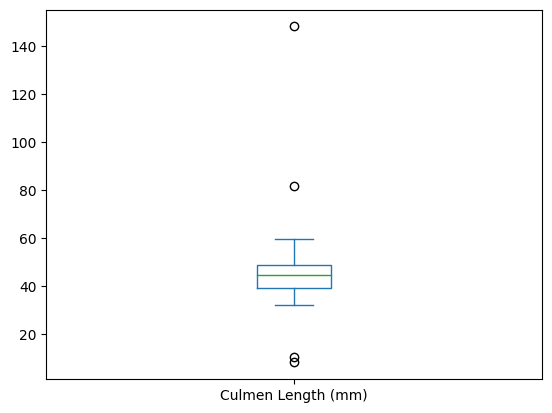

In [31]:
df_com_outliers['Culmen Length (mm)'].plot.box()

A partir do Box Plot, conseguimos visualizar melhor a distribuição dos outliers, que nesse caso varia entre valores menores que 20mm, podendo chegar até mais que 140mm.

<Axes: >

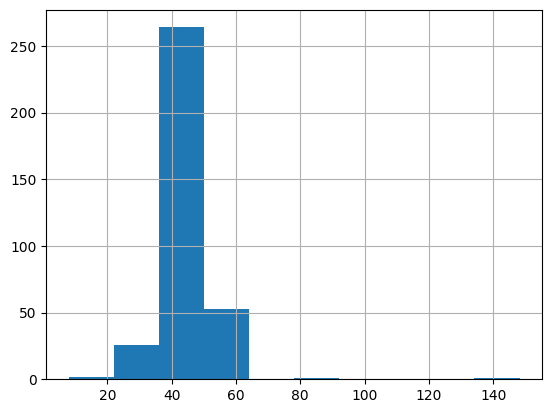

In [32]:
df_com_outliers['Culmen Length (mm)'].hist()

Para visualizar melhor a distribuição, vamos usar o log e calucar o MAD para usar no Z-Score.

<Axes: >

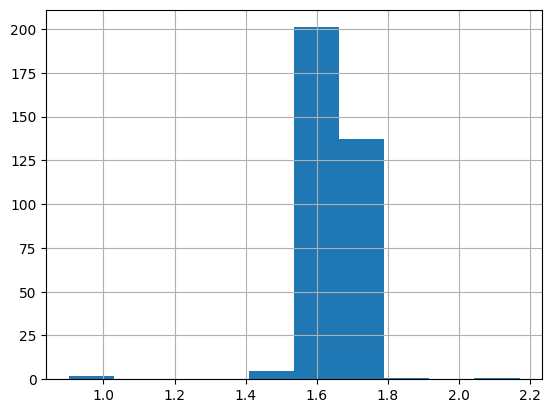

In [33]:
from numpy import log10
df_com_outliers['Culmen Length Log(mm)'] = log10(df_com_outliers['Culmen Length (mm)'])
df_com_outliers['Culmen Length Log(mm)'].hist()

In [34]:
from numpy import abs
mad = abs(df_com_outliers['Culmen Length Log(mm)'] - df_com_outliers['Culmen Length Log(mm)'].median()).median()*(1/0.6745)
print(mad)

0.06726010073048969


<Axes: >

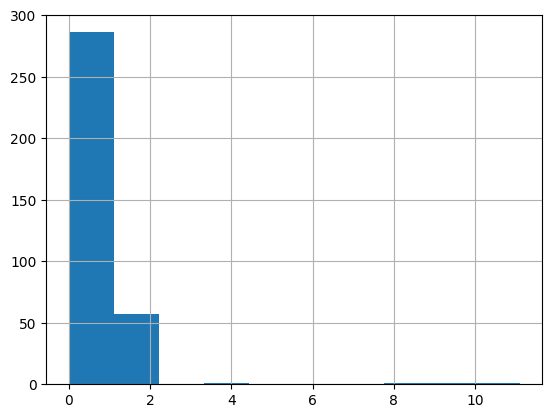

In [35]:
(abs(df_com_outliers['Culmen Length Log(mm)']-df_com_outliers['Culmen Length Log(mm)'].median())/mad).hist()

Com as informações do histograma, vamos definir o limiar como 2.

In [36]:
limiar = 2

df_com_outliers[abs(df_com_outliers['Culmen Length Log(mm)']-df_com_outliers['Culmen Length Log(mm)'].median())/mad > limiar]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),flipper_length_category,species,Culmen Length Log(mm)
142,PAL0910,143.0,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N81A1,Yes,2009-11-16,32.100000,15.5,-0.919812,3050.0,FEMALE,8.79787,-26.61075,short,NaN,1.506505
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.982820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outlier,0.902156
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.493087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outlier,1.911121
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.209149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outlier,1.008990
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.188579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outlier,2.170815


Removendo outliers univariados para 'Culmen Length (mm)'

In [37]:
print("Tamanho do Dataset antes da remoção de outliers: ", len(df_com_outliers))

Tamanho do Dataset antes da remoção de outliers:  347


In [38]:
df_com_outliers = df_com_outliers[abs(df_com_outliers['Culmen Length Log(mm)']-df_com_outliers['Culmen Length Log(mm)'].median())/mad < limiar]
print("Tamanho do Dataset depois da remoção de outliers: ",len(df_com_outliers))

Tamanho do Dataset depois da remoção de outliers:  342


## Tratamento Bivariado com Z-Score
Calculamos o Z-Score padrão para 'Culmen Length (mm)' e 'Flipper Lenght (mm)'. Então, primeiro vamos observar a relação entre as features.


<Axes: xlabel='Culmen Length (mm)', ylabel='Flipper Length (mm)'>

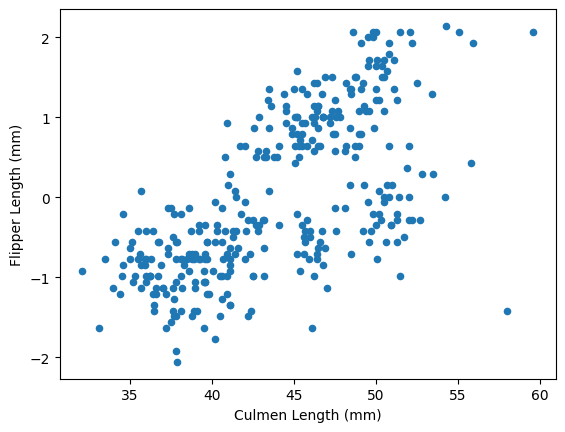

In [39]:
df.plot.scatter(x='Culmen Length (mm)',y='Flipper Length (mm)')

Vamos criar uma variável para representar e incluir as duas features.

In [40]:
df2 = df
df2['Culmen_2'] = df2['Culmen Length (mm)'] / df2['Flipper Length (mm)']
df2['Culmen_2'].describe()

count     342.000000
mean      125.747549
std      1104.180744
min      -774.774884
25%       -59.848524
50%       -30.105834
75%        43.714427
max      8974.903381
Name: Culmen_2, dtype: float64

<Axes: >

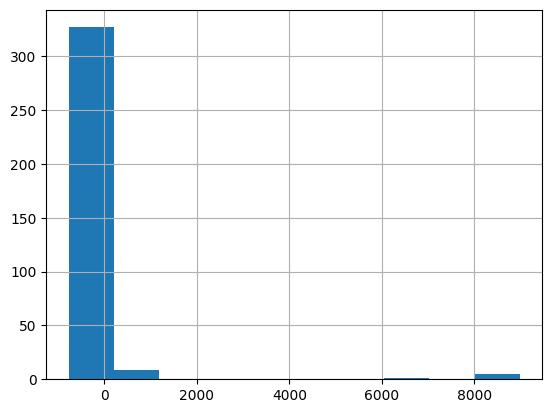

In [41]:
df2['Culmen_2'].hist()

para observar melhor as distribuições, vamos usar o Log.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

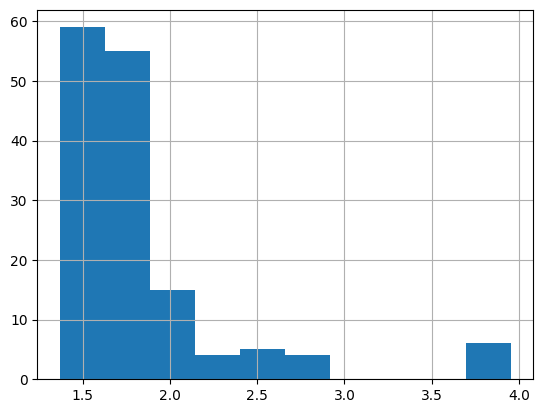

In [42]:
df2['Culmen_2'] = log10(df2['Culmen_2'])
df2['Culmen_2'].hist()

<Axes: >

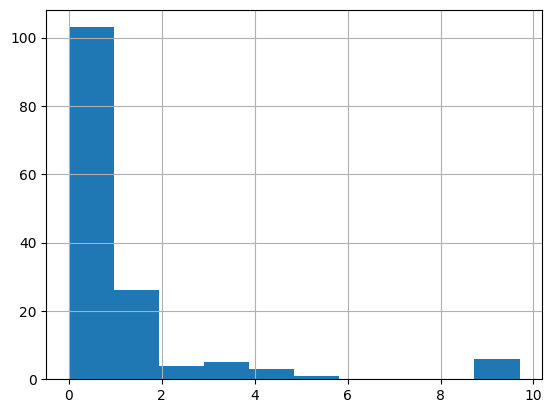

In [43]:
mad = abs(df2['Culmen_2'] - df2['Culmen_2'].median()).median()*(1/0.6745)
(abs(df2['Culmen_2']-df2['Culmen_2'].median())/mad).hist()

Novamente iremos usar o limiar de 2, segundo as informações retiradas do gráfico. A partir disso, vamos observar as linhas consideradas outliers para poder removê-las.

In [44]:
limiar = 2

df2[abs(df2['Culmen_2']-df2['Culmen_2'].median())/mad > limiar]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),flipper_length_category,Culmen_2
90,PAL0809,91,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N45A1,Yes,2008-11-14,35.7,18.0,0.077258,3550.0,FEMALE,8.465310,-26.05621,medium,2.664723
91,PAL0809,92,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N45A2,Yes,2008-11-14,41.1,18.1,0.290916,4300.0,MALE,8.770180,-25.83352,medium,2.150074
101,PAL0910,102,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N47A2,Yes,2009-11-09,41.0,20.0,0.148478,4725.0,MALE,9.010790,-26.38085,medium,2.441123
123,PAL0910,124,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N67A2,Yes,2009-11-16,41.4,18.5,0.077258,3875.0,MALE,9.594620,-25.42621,medium,2.729055
151,PAL0910,152,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N85A2,Yes,2009-11-17,41.5,18.5,0.006039,4000.0,MALE,8.896400,-26.06967,medium,3.837079
250,PAL0910,99,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N21A1,Yes,2009-11-18,48.4,14.4,0.148478,4625.0,FEMALE,8.165820,-26.13971,medium,2.513184
289,PAL0708,14,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N69A2,Yes,2007-11-26,52.0,18.1,0.006039,4050.0,MALE,9.023300,-24.38933,medium,3.935034
291,PAL0708,16,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N70A2,Yes,2007-11-22,50.5,19.6,0.006039,4050.0,MALE,9.805900,-24.72940,medium,3.922322
305,PAL0809,30,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N62A2,Yes,2008-11-14,52.8,20.0,0.290916,4550.0,MALE,9.251770,-24.69638,medium,2.258866
307,PAL0809,32,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A2,Yes,2008-11-24,54.2,20.8,0.006039,4300.0,MALE,9.492830,-24.59996,medium,3.953030


In [45]:
from scipy.stats import zscore, chi2


def remove_outliers_bivariate(df2, col1, col2):
    df2[f'{col1}_z'] = zscore(df2[col1])
    df2[f'{col2}_z'] = zscore(df2[col2])
    outliers_bivariados = df2[(np.abs(df2[f'{col1}_z']) >= limiar) | (np.abs(df2[f'{col2}_z']) >= limiar)]

    print(f"Número de outliers bivariados (Z-Score >= limiar): {len(outliers_bivariados)}")
    print(outliers_bivariados[[col1, col2, f'{col1}_z', f'{col2}_z']])


    df2 = df2[(np.abs(df2[f'{col1}_z']) < limiar) & (np.abs(df2[f'{col2}_z']) < limiar)]
    df2 = df2.drop(columns=[f'{col1}_z', f'{col2}_z'])

    return df2, outliers_bivariados

Plotando gráficos de comparação com a presença e com a retirada de outliers.

In [46]:
def plot_bivariate(df_before, df_after, outliers, col1, col2):
    plt.figure(figsize=(14, 6))

    # Antes da remoção de outliers
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df_before, x=col1, y=col2)
    sns.scatterplot(data=outliers, x=col1, y=col2, color='red', label='Outliers')
    plt.title('Antes da Remoção de Outliers')
    plt.xlabel(col1)
    plt.ylabel(col2)

    # Depois da remoção de outliers
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df_after, x=col1, y=col2)
    plt.title('Depois da Remoção de Outliers')
    plt.xlabel(col1)
    plt.ylabel(col2)

    plt.tight_layout()
    plt.show()

Número de outliers bivariados (Z-Score >= limiar): 15
     Culmen Length (mm)  Flipper Length (mm)  Culmen Length (mm)_z  \
28                 37.9            -2.059320             -1.104618   
142                32.1            -0.919812             -2.168526   
153                50.0             2.071398              1.114916   
185                59.6             2.071398              2.875868   
215                54.3             2.142618              1.903676   
217                49.8             2.071398              1.078229   
219                49.5             2.000179              1.023199   
227                48.6             2.071398              0.858110   
241                52.1             2.071398              1.500124   
253                55.9             1.928960              2.197168   
263                49.8             2.000179              1.078229   
265                51.5             2.071398              1.390065   
267                55.1             

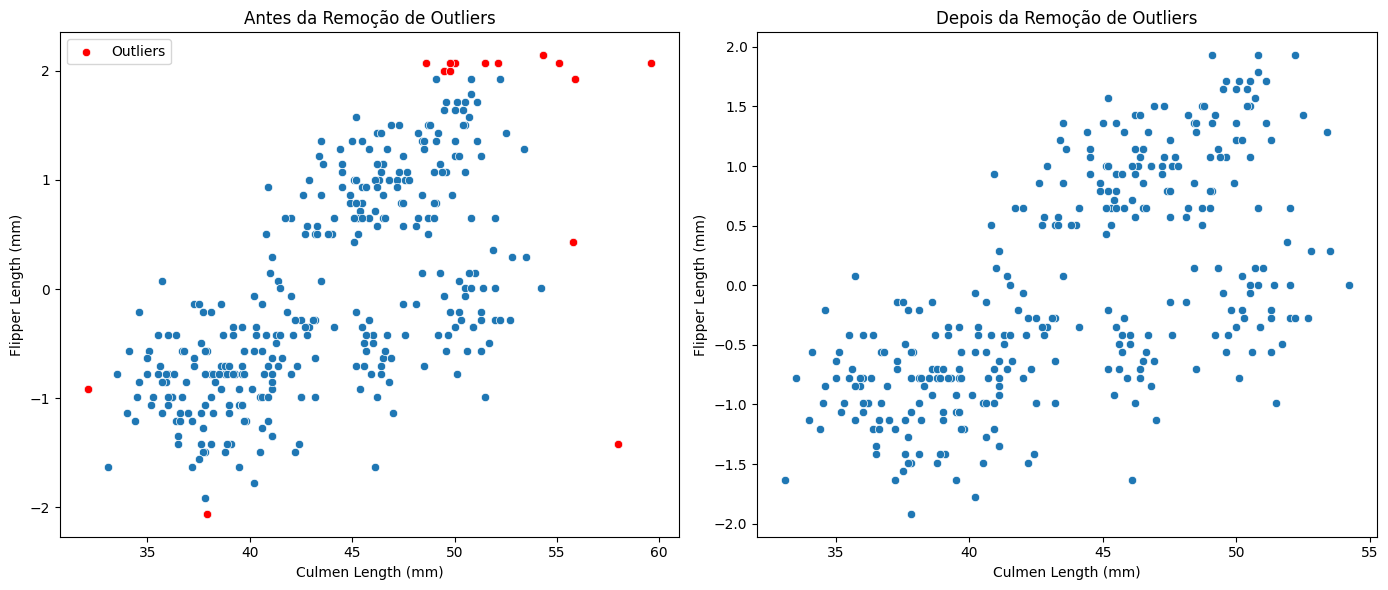

In [47]:
# Remover outliers bivariados para 'Culmen Length (mm)' e 'Culmen Depth (mm)'
df_before = df.copy()
df2, outliers_bivariados = remove_outliers_bivariate(df2, 'Culmen Length (mm)', 'Flipper Length (mm)')

plot_bivariate(df_before, df2, outliers_bivariados, 'Culmen Length (mm)', 'Flipper Length (mm)')

## Tratamento Multivariado com Elliptic Envelope
Distância de Mahalanobis: Calculamos a Distância de Mahalanobis para um conjunto de variáveis 'Culmen Length (mm), Flipper Length (mm), Body Mass (g)', na qual valores acima de um limiar baseado na distribuição qui-quadrado são considerados outliers.


Primeiro, vamos separar o nosso dataset e transformar as colunas categóricas para que possamos fazer os devidos cálculos.

In [49]:
df3 = df
df3['studyName'] = df3['studyName'].astype('category')
df3['Species'] = df3['Species'].astype('category')
df3['Region'] = df3['Region'].astype('category')
df3['Island'] = df3['Island'].astype('category')
df3['Stage'] = df3['Stage'].astype('category')
df3['Individual ID'] = df3['Individual ID'].astype('category')
df3['Clutch Completion'] = df3['Clutch Completion'].astype('category')
df3['Date Egg'] = df3['Date Egg'].astype('category')
df3['Sex'] = df3['Sex'].astype('category')

In [50]:
df3['studyName'] = df3['studyName'].cat.codes
df3['Species'] = df3['Species'].cat.codes
df3['Region'] = df3['Region'].cat.codes
df3['Island'] = df3['Island'].cat.codes
df3['Stage'] = df3['Stage'].cat.codes
df3['Individual ID'] = df3['Individual ID'].cat.codes
df3['Clutch Completion'] = df3['Clutch Completion'].cat.codes
df3['Date Egg'] = df3['Date Egg'].cat.codes
df3['Sex'] = df3['Sex'].cat.codes
df3 = df3.drop('Culmen_2', axis=1)
df3 = df3.drop('flipper_length_category', axis=1)

In [51]:
df3.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Culmen Length (mm)_z,Flipper Length (mm)_z
0,0,1,0,0,2,0,22,1,2,39.1,18.7,-1.418347,3750.0,1,8.652405,-25.83352,-0.884499,-1.418347
1,0,2,0,0,2,0,23,1,2,39.5,17.4,-1.062250,3800.0,0,8.949560,-24.69454,-0.811126,-1.062250
2,0,3,0,0,2,0,44,1,6,40.3,18.0,-0.421277,3250.0,0,8.368210,-25.33302,-0.664380,-0.421277
4,0,5,0,0,2,0,66,1,6,36.7,19.3,-0.563715,3450.0,0,8.766510,-25.32426,-1.324737,-0.563715
5,0,6,0,0,2,0,67,1,6,39.3,20.6,-0.777373,3650.0,1,8.664960,-25.29805,-0.847812,-0.777373


In [53]:
from sklearn.covariance import EllipticEnvelope

df3_numeric = df3.select_dtypes(include='number')
detector = EllipticEnvelope(contamination=0.01)
detector.fit(df3_numeric)

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


EllipticEnvelope(contamination=0.01)

In [54]:
scores = detector.predict(df3)

scores

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

Com isso, agora vamos criar uma nova coluna com os scores dos outliers/não outliers no dataset.

In [55]:
df3['outlier'] = scores
df3.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Culmen Length (mm)_z,Flipper Length (mm)_z,outlier
0,0,1,0,0,2,0,22,1,2,39.1,18.7,-1.418347,3750.0,1,8.652405,-25.83352,-0.884499,-1.418347,1
1,0,2,0,0,2,0,23,1,2,39.5,17.4,-1.062250,3800.0,0,8.949560,-24.69454,-0.811126,-1.062250,1
2,0,3,0,0,2,0,44,1,6,40.3,18.0,-0.421277,3250.0,0,8.368210,-25.33302,-0.664380,-0.421277,1
4,0,5,0,0,2,0,66,1,6,36.7,19.3,-0.563715,3450.0,0,8.766510,-25.32426,-1.324737,-0.563715,1
5,0,6,0,0,2,0,67,1,6,39.3,20.6,-0.777373,3650.0,1,8.664960,-25.29805,-0.847812,-0.777373,1


Para vermos apenas os outliers, setamos a visualização para que a coluna mostre os valores com -1 da respectiva coluna.

In [56]:
df3[df3['outlier'] == -1]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Culmen Length (mm)_z,Flipper Length (mm)_z,outlier
9,0,10,0,0,2,0,105,1,0,42.0,20.2,-0.777373,4250.0,-1,9.133620,-25.09368,-0.352544,-0.777373,-1
11,0,12,0,0,2,0,127,1,0,37.8,17.3,-1.489566,3700.0,-1,8.652405,-25.83352,-1.122961,-1.489566,-1
14,0,15,0,0,2,0,170,1,6,34.6,21.1,-0.207619,4400.0,1,8.555830,-25.22588,-1.709945,-0.207619,-1
293,0,18,1,0,1,0,131,0,15,58.0,17.8,-1.418347,3700.0,0,9.143820,-24.57994,2.582376,-1.418347,-1


In [57]:
print('Tamanho do Dataset antes da remoção: ', len(df3))

Tamanho do Dataset antes da remoção:  342


In [58]:
df3 = df3[df3['outlier'] != -1]
print('Tamanho do Dataset antes da remoção: ', len(df3))

Tamanho do Dataset antes da remoção:  338


# Análises Descritivas

In [ ]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),mahalanobis_distance
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,63.483384,43.773112,17.137160,-0.012035,4190.634441,8.736278,-25.696951,1.927725
std,40.097028,5.257765,1.934153,0.990626,795.193357,0.538718,0.784131,0.522127
min,1.000000,33.100000,13.300000,-2.059320,2700.000000,7.632200,-27.018540,0.663449
25%,30.000000,39.200000,15.600000,-0.777373,3550.000000,8.315880,-26.300280,1.536739
50%,58.000000,44.100000,17.300000,-0.278838,4000.000000,8.652405,-25.833520,1.894430
75%,95.000000,48.400000,18.650000,0.860670,4750.000000,9.150855,-25.085255,2.296263
max,152.000000,54.300000,21.100000,2.142618,6300.000000,10.025440,-23.787670,3.752731


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 343
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   studyName                331 non-null    category
 1   Sample Number            331 non-null    int64   
 2   Species                  331 non-null    category
 3   Region                   331 non-null    category
 4   Island                   331 non-null    category
 5   Stage                    331 non-null    category
 6   Individual ID            331 non-null    category
 7   Clutch Completion        331 non-null    category
 8   Date Egg                 331 non-null    category
 9   Culmen Length (mm)       331 non-null    float64 
 10  Culmen Depth (mm)        331 non-null    float64 
 11  Flipper Length (mm)      331 non-null    float64 
 12  Body Mass (g)            331 non-null    float64 
 13  Sex                      322 non-null    object  
 14  Delta 15 N (o/o

Estatísticas Descritivas para Variáveis Categóricas

In [ ]:
print("\nContagem de Valores Categóricos:")
print(df['Species'].value_counts())
print(df['Island'].value_counts())
print(df['Sex'].value_counts())


Contagem de Valores Categóricos:
Species
Adelie Penguin (Pygoscelis adeliae)          147
Gentoo penguin (Pygoscelis papua)            118
Chinstrap penguin (Pygoscelis antarctica)     66
Name: count, dtype: int64
Island
Biscoe       162
Dream        120
Torgersen     49
Name: count, dtype: int64
Sex
MALE      161
FEMALE    161
Name: count, dtype: int64


Média do comprimento do culmen por espécie

In [ ]:
print("\nComprimento Médio do Culmen por Espécie:")
print(df.groupby(['Species'])['Culmen Length (mm)'].mean().sort_values())


Comprimento Médio do Culmen por Espécie:
Species
Adelie Penguin (Pygoscelis adeliae)          38.765306
Gentoo penguin (Pygoscelis papua)            47.317797
Chinstrap penguin (Pygoscelis antarctica)    48.589394
Name: Culmen Length (mm), dtype: float64


Chinstrap penguin (Pygoscelis antarctica) tem o maior comprimento de culmen em média

Média do comprimento do culmen por ilha

In [ ]:
print("\nComprimento Médio do Culmen por Ilha:")
print(df.groupby(['Island'])['Culmen Length (mm)'].mean().sort_values())


Comprimento Médio do Culmen por Ilha:
Island
Torgersen    38.814286
Dream        44.071667
Biscoe       45.051852
Name: Culmen Length (mm), dtype: float64


A ilha de Biscoe tem em média os pinguins com maior comprimento de culmen

# Visualizações - Gráficos

## Histogramas para cada variável numérica

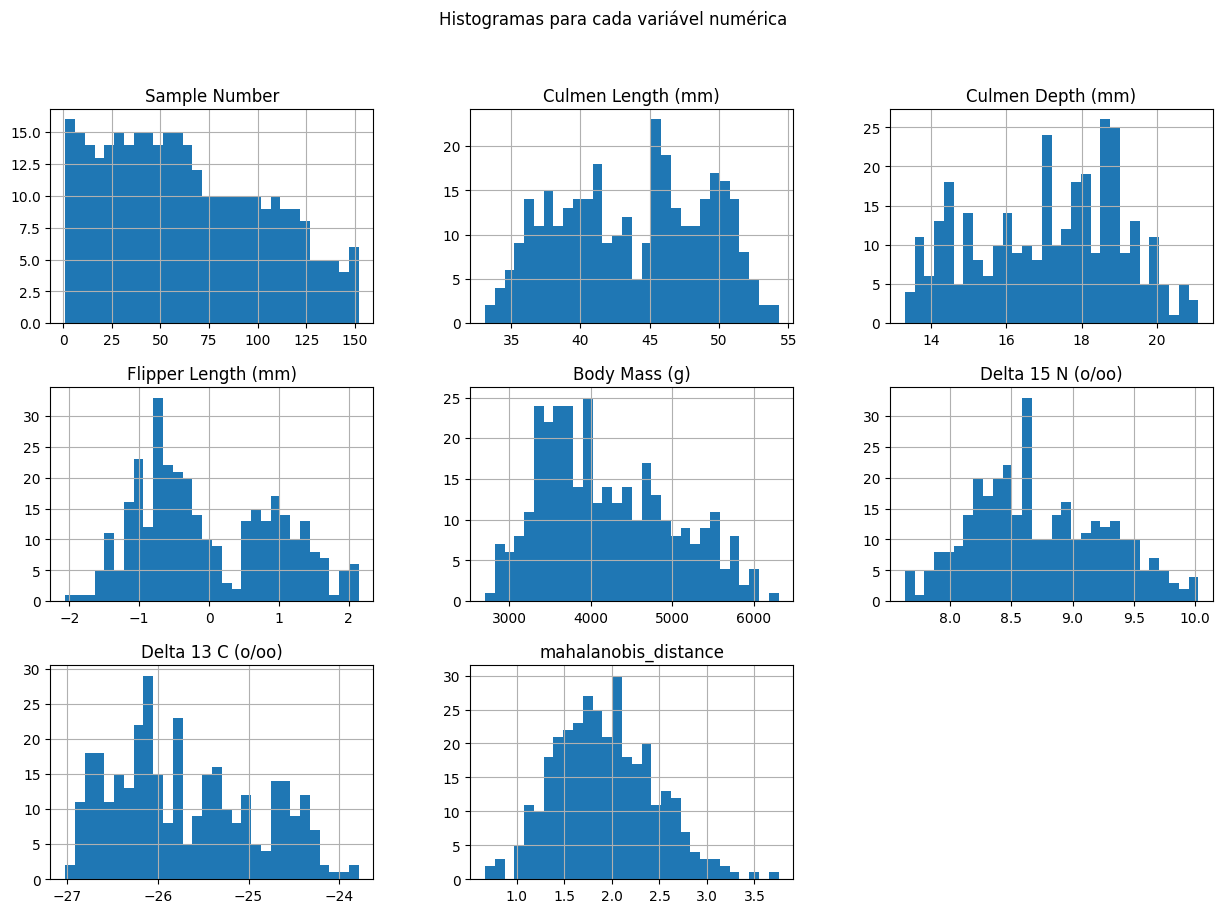

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogramas para cada variável numérica')
plt.show()

Visualização da relação entre comprimento do culmen e comprimento da nadadeira

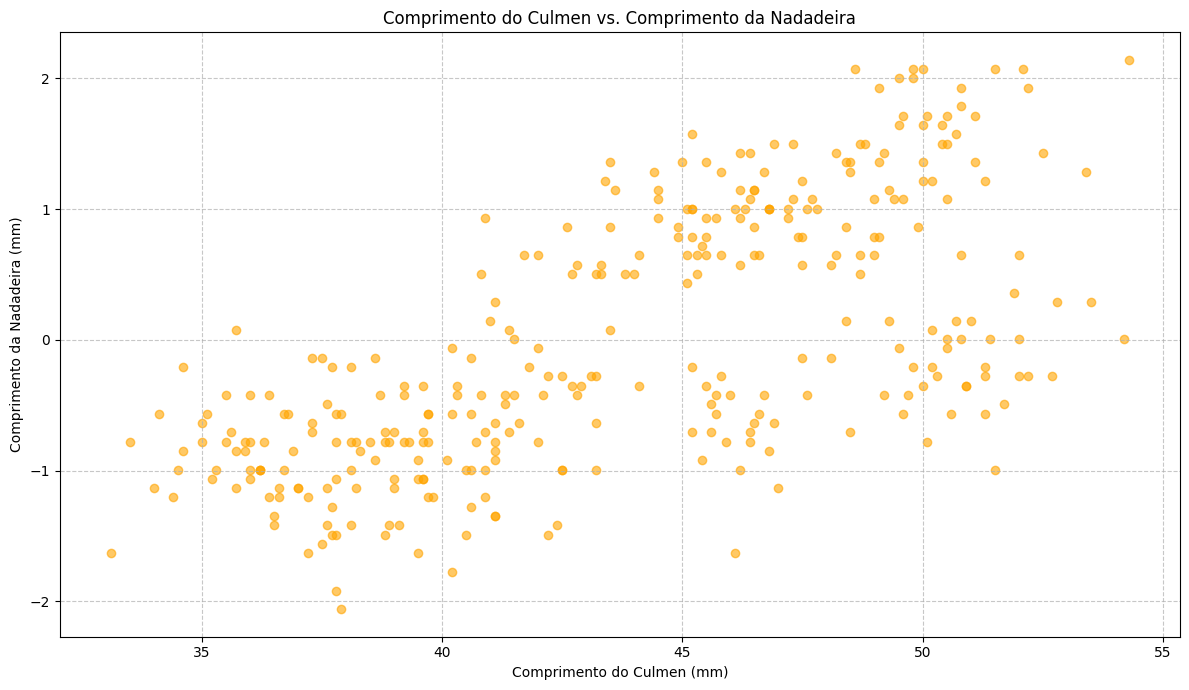

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(df['Culmen Length (mm)'], df['Flipper Length (mm)'], color='orange', alpha=0.6)
plt.xlabel('Comprimento do Culmen (mm)')
plt.ylabel('Comprimento da Nadadeira (mm)')

plt.title('Comprimento do Culmen vs. Comprimento da Nadadeira')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Mediana da massa corporal para cada espécie

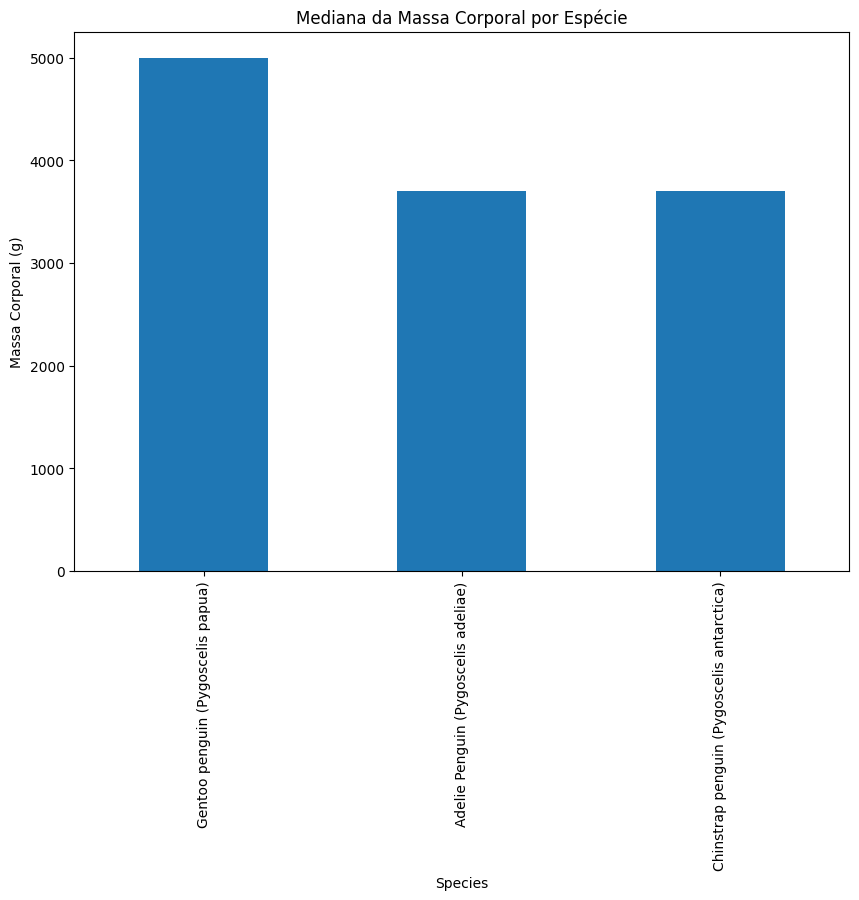

In [ ]:
plt.figure(figsize=(10, 7))
df.groupby(['Species'])['Body Mass (g)'].median().sort_values(ascending=False).plot.bar()
plt.title('Mediana da Massa Corporal por Espécie')
plt.ylabel('Massa Corporal (g)')
plt.show()

## Box plots para cada variável numérica

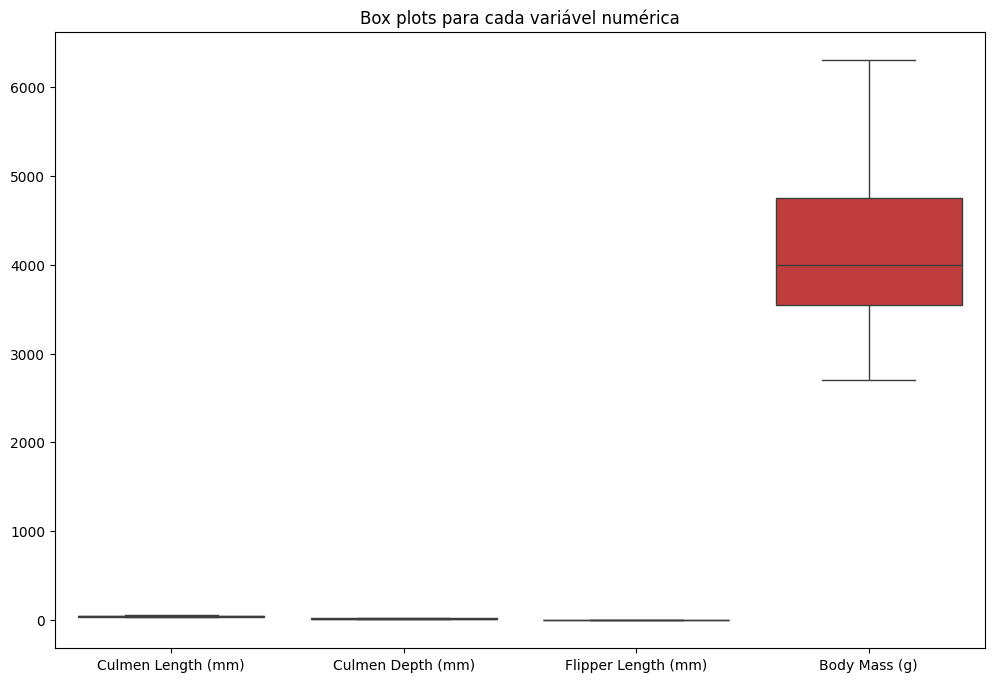

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']])
plt.title('Box plots para cada variável numérica')
plt.show()

Box Plot para Body Mass

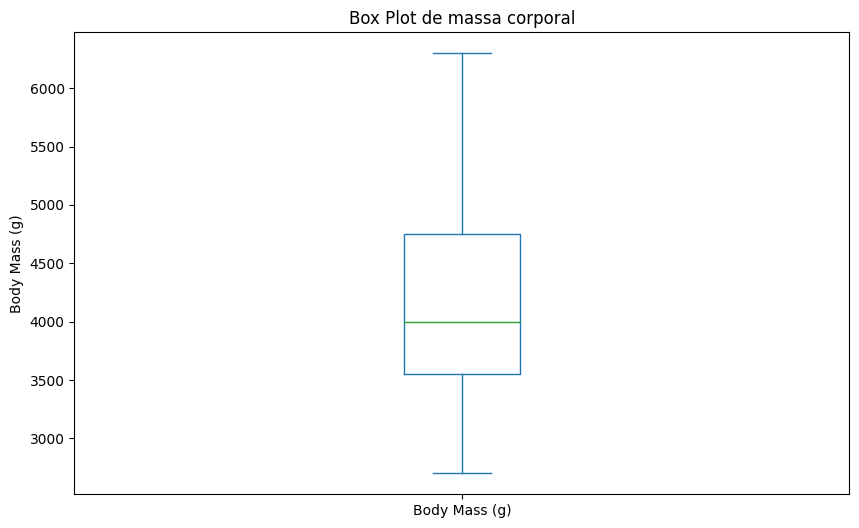

In [ ]:
plt.figure(figsize=(10, 6))
df['Body Mass (g)'].plot.box()
plt.title('Box Plot de massa corporal')
plt.ylabel('Body Mass (g)')
plt.show()

## Gráfico de contagem para variáveis categóricas

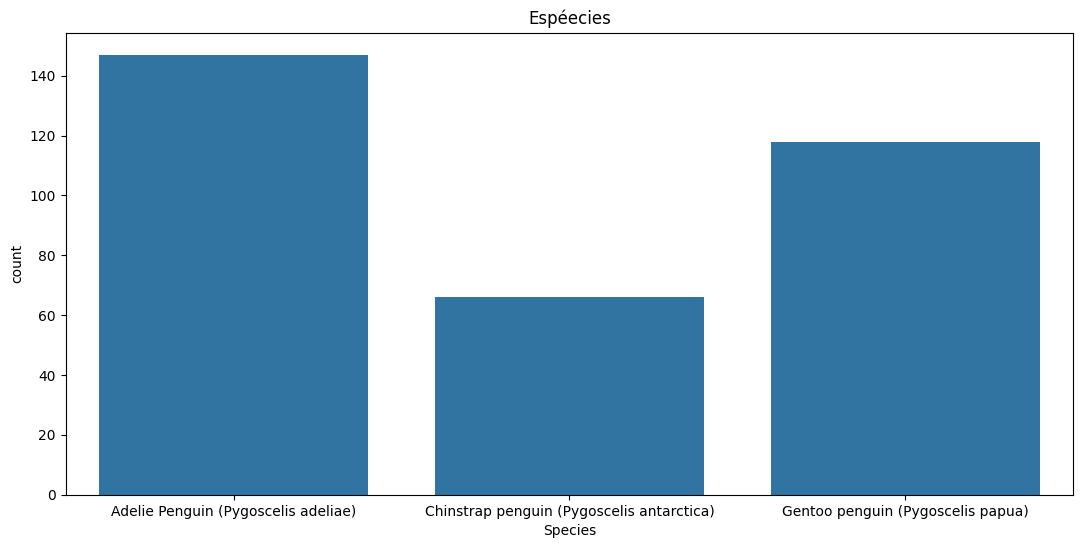

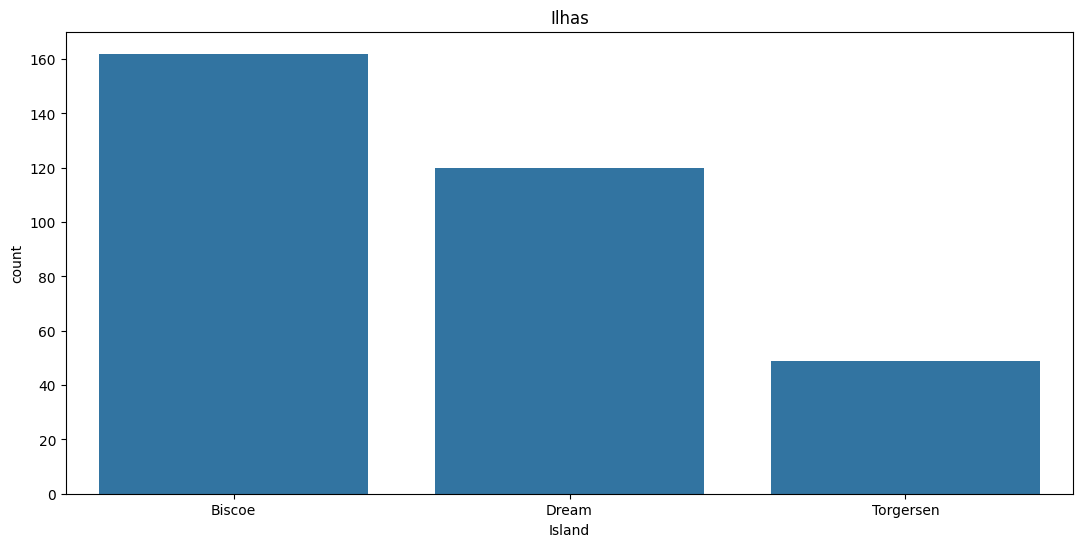

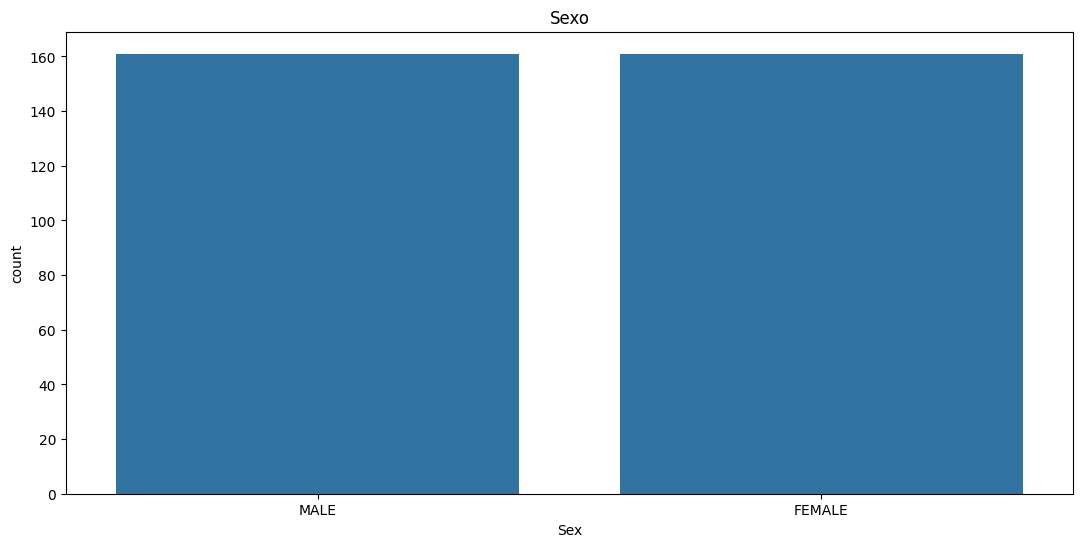

In [ ]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='Species')
plt.title('Espéecies')
plt.show()

plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='Island')
plt.title('Ilhas')
plt.show()

plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='Sex')
plt.title('Sexo')
plt.show()

## Pairplot para ver a distribuição e a relação entre variáveis numéricas

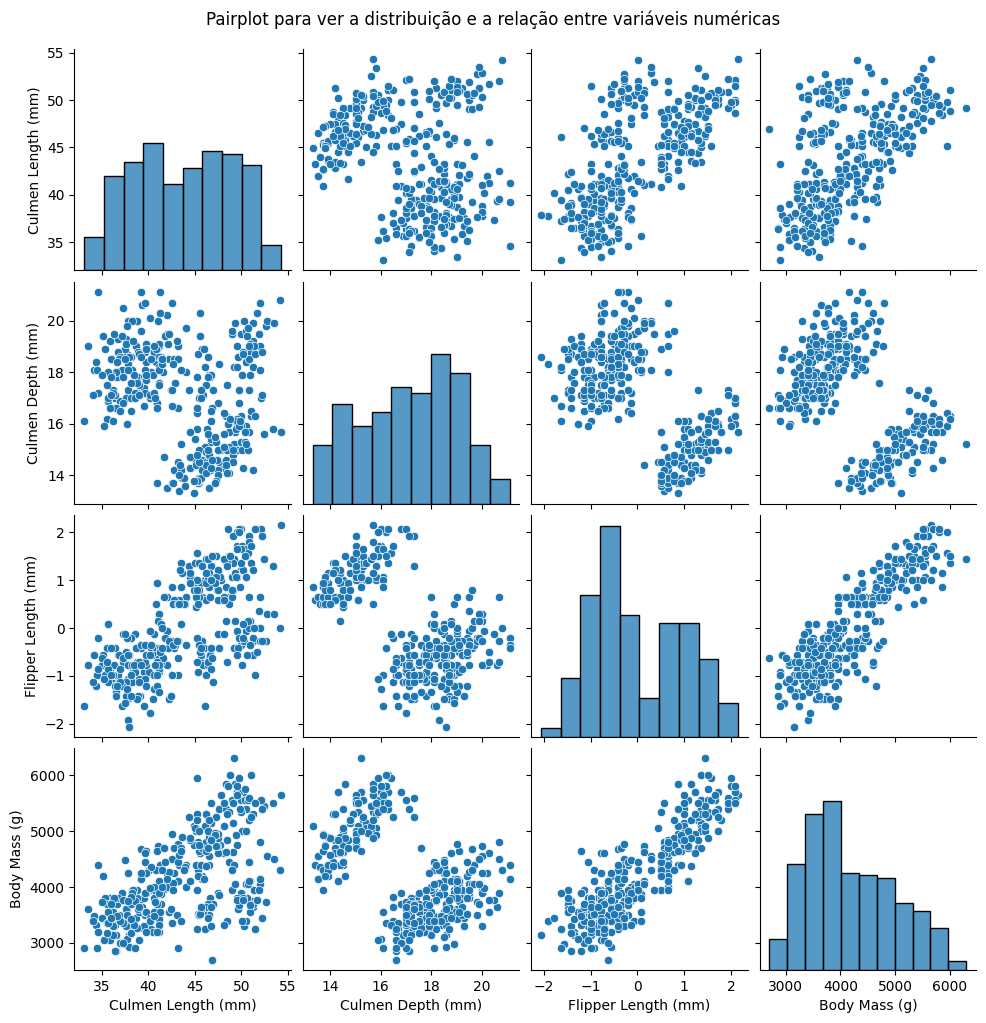

In [ ]:
sns.pairplot(df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']])
plt.suptitle('Pairplot para ver a distribuição e a relação entre variáveis numéricas', y=1.02)
plt.show()

## Heatmap de correlação


Heatmap de Correlação:


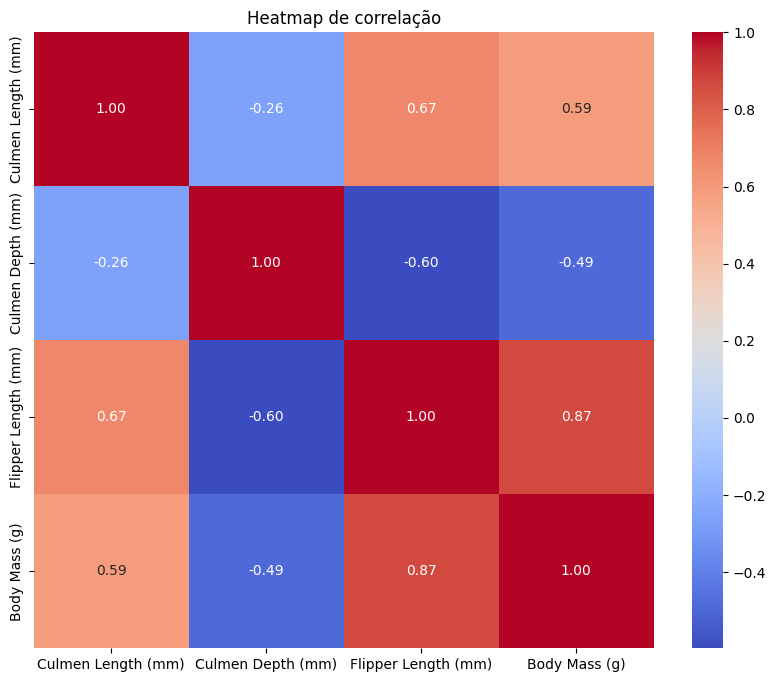

In [ ]:
print("\nHeatmap de Correlação:")
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de correlação')
plt.show()

## Gráfico de barras


Bar Plot:


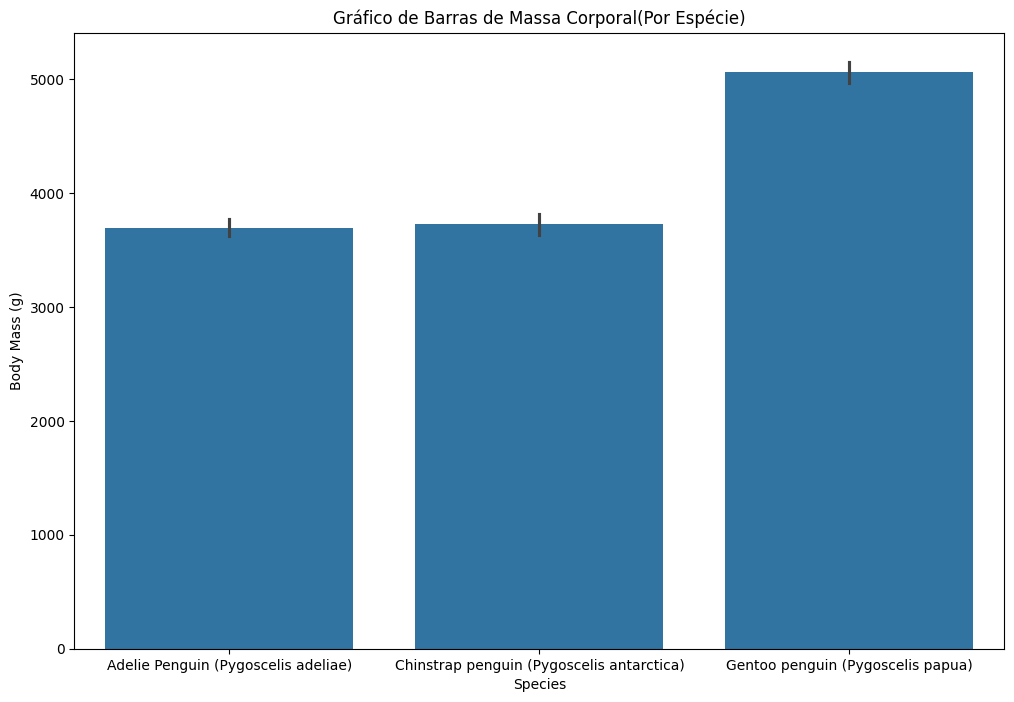

In [ ]:
print("\nBar Plot:")
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Species', y='Body Mass (g)')
plt.title('Gráfico de Barras de Massa Corporal(Por Espécie)')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

# Cálculo de Mediana e Moda

In [ ]:
median_values = df.median(numeric_only=True)
print("\nMediana dos Valores Numéricos:")
print(median_values)


Mediana dos Valores Numéricos:
Sample Number             58.000000
Culmen Length (mm)        44.100000
Culmen Depth (mm)         17.300000
Flipper Length (mm)       -0.278838
Body Mass (g)           4000.000000
Delta 15 N (o/oo)          8.652405
Delta 13 C (o/oo)        -25.833520
mahalanobis_distance       1.894430
dtype: float64


In [ ]:
mode_values = df.mode(numeric_only=True).iloc[0]
print("\nModa dos Valores Numéricos:")
print(mode_values)


Moda dos Valores Numéricos:
Sample Number              2.000000
Culmen Length (mm)        41.100000
Culmen Depth (mm)         15.000000
Flipper Length (mm)       -0.777373
Body Mass (g)           3800.000000
Delta 15 N (o/oo)          8.652405
Delta 13 C (o/oo)        -25.833520
mahalanobis_distance       0.663449
Name: 0, dtype: float64


# Teste de Hipóteses

Realizaremos dois testes de hipóteses, cada um com sua própria hipótese nula:

1. Teste de Normalidade: Para verificar se a distribuição do comprimento do culmen segue uma distribuição normal.

2. Comparação de Médias: Para verificar se há ou não há uma diferença significativa no comprimento do culmen entre as espécies Adelie e Gentoo.

In [ ]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),flipper_length_category,mahalanobis_distance
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,-1.418347,3750.0,MALE,8.652405,-25.83352,short,1.975865
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,-1.062250,3800.0,FEMALE,8.949560,-24.69454,short,1.531594
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,-0.421277,3250.0,FEMALE,8.368210,-25.33302,medium,1.834816
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,-0.563715,3450.0,FEMALE,8.766510,-25.32426,medium,2.147051
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,2007-11-16,39.3,20.6,-0.777373,3650.0,MALE,8.664960,-25.29805,short,2.017639


1ª hipótese nula: A distribuição do comprimento do culmen segue uma distribuição normal


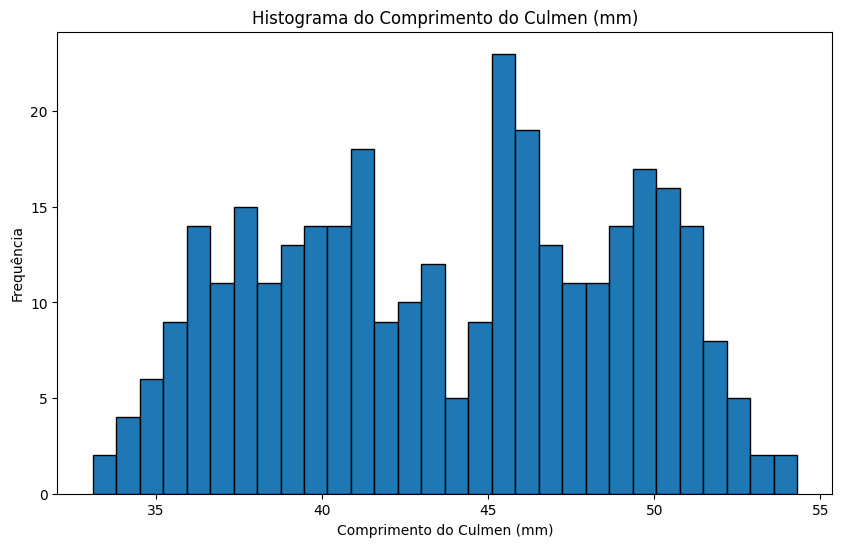

In [ ]:
plt.figure(figsize=(10, 6))
df['Culmen Length (mm)'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Histograma do Comprimento do Culmen (mm)')
plt.xlabel('Comprimento do Culmen (mm)')
plt.ylabel('Frequência')
plt.show()

## Teste para normalidade(Shapiro-Wilk)

In [ ]:
from scipy import stats

### Sobre o valor da estatística de teste:

A estatística de teste do Shapiro-Wilk varia entre 0 e 1.

Quanto mais próximo de 1, mais a distribuição dos dados se assemelha a uma distribuição normal.

### Sobre o valor de p:

O valor p indica a probabilidade de observar os dados, ou algo mais extremo, se a hipótese nula for verdadeira.

Se p < 0.05 -> rejeitamos a hipótese nula.
Se p >= 0.05 -> não rejeitamos a hipótese nula.

Teste de normalidade:

In [ ]:
shapiro_stat, shapiro_p_value = stats.shapiro(df['Culmen Length (mm)'])
print("Teste de Shapiro-Wilk para Comprimento do Culmen:")
print("Estatística de teste:", shapiro_stat)
print("Valor p:", shapiro_p_value)

Teste de Shapiro-Wilk para Comprimento do Culmen:
Estatística de teste: 0.9614539742469788
Valor p: 1.1589487058927261e-07


### Sobre nosso resultado:

Estatística de teste: 0.9614539742469788 (próximo de 1, indicando uma distribuição relativamente próxima da normal)

Valor p: 1.1589487058927261e-07 (esse valor p é extremamente pequeno, muito menor que 0.05 que usamos pra decidir se rejeitamos a hipótese nula)

In [ ]:
if shapiro_p_value < 0.05:
    print("Rejeitamos a hipótese nula. A distribuição do comprimento do culmen não segue uma distribuição normal.")
else:
    print("Não rejeitamos a hipótese nula. A distribuição do comprimento do culmen segue uma distribuição normal.")

Rejeitamos a hipótese nula. A distribuição do comprimento do culmen não segue uma distribuição normal.


### 2ª hipótese nula: Não há diferença significativa no comprimento do culmen entre as espécies Adelie e Gentoo

In [ ]:
adelie = df[df['Species'] == 'Adelie Penguin (Pygoscelis adeliae)']['Culmen Length (mm)']
gentoo = df[df['Species'] == 'Gentoo penguin (Pygoscelis papua)']['Culmen Length (mm)']

In [ ]:
print(f"Número de observações - Adelie: {len(adelie)}")
print(f"Número de observações - Gentoo: {len(gentoo)}")

Número de observações - Adelie: 147
Número de observações - Gentoo: 118


Teste de Shapiro-Wilk para cada espécie

In [ ]:
print("\nTestes de Shapiro-Wilk para cada espécie")
statistic_adelie, p_value_adelie = stats.shapiro(adelie)
print("Para a espécie Adelie:")
print("Estatística de teste:", statistic_adelie)
print("Valor p:", p_value_adelie)

statistic_gentoo, p_value_gentoo = stats.shapiro(gentoo)
print("\nPara a espécie Gentoo:")
print("Estatística de teste:", statistic_gentoo)
print("Valor p:", p_value_gentoo)


Testes de Shapiro-Wilk para cada espécie
Para a espécie Adelie:
Estatística de teste: 0.9909147620201111
Valor p: 0.4654911458492279

Para a espécie Gentoo:
Estatística de teste: 0.9916238784790039
Valor p: 0.6965477466583252


Escolhendo o tipo de teste

In [ ]:
if p_value_adelie < 0.05 or p_value_gentoo < 0.05:
    print("\nOs dados não seguem uma distribuição normal. Usando o teste de Mann-Whitney.")
    mw_stat, mw_p_value = stats.mannwhitneyu(adelie, gentoo)
    print("Resultado do teste Mann-Whitney:")
    print("Estatística de teste:", mw_stat)
    print("Valor p:", mw_p_value)
    teste_usado = "Teste de Mann-Whitney"
    valor_p = mw_p_value
else:
    print("\nOs dados seguem uma distribuição normal. Usando o teste t de Student.")
    t_stat, t_p_value = stats.ttest_ind(adelie, gentoo)
    print("Resultado do teste t de Student:")
    print("Estatística de teste:", t_stat)
    print("Valor p:", t_p_value)
    teste_usado = "Teste t de Student"
    valor_p = t_p_value


Os dados seguem uma distribuição normal. Usando o teste t de Student.
Resultado do teste t de Student:
Estatística de teste: -26.36250072631299
Valor p: 8.636662484081455e-76


Uma estatística de teste t tão negativa indica que há uma grande diferença entre as médias dos grupos.

Dado que o valor p é extremamente pequeno(8.636662484081455**e-76**), rejeitamos a hipótese nula. Isso significa que há uma diferença significativa no comprimento do culmen entre as espécies Adelie e Gentoo.

Resultados

In [ ]:
if valor_p < 0.05:
    print(f"Rejeitamos a hipótese nula. Há uma diferença considerável no comprimento do culmen entre as espécies Adelie e Gentoo. ({teste_usado})")
else:
    print(f"Não rejeitamos a hipótese nula. Não há diferença considerável no comprimento do culmen entre as espécies Adelie e Gentoo. ({teste_usado})")

Rejeitamos a hipótese nula. Há uma diferença considerável no comprimento do culmen entre as espécies Adelie e Gentoo. (Teste t de Student)
